# Explorative Data Analysis


### Import necessary packages

In [23]:
import matplotlib.pyplot as plt

from match import Match
from utils import save_to_json

### Exploring the data

In [24]:
match_1_instance = Match("../data/match_1.json")
match_2_instance = Match("../data/match_2.json")

In [25]:
match_1_instance.info()
match_2_instance.info()

Number of gaits in this match is: 574
Number of gaits in this match is: 613


## Label

In [26]:
match_1_instance.count_actions()

Counter({'walk': 245,
         'run': 209,
         'dribble': 42,
         'rest': 25,
         'pass': 24,
         'tackle': 20,
         'shot': 6,
         'cross': 3})

In [27]:
match_2_instance.count_actions()

Counter({'run': 343,
         'walk': 190,
         'dribble': 36,
         'shot': 12,
         'tackle': 11,
         'rest': 10,
         'pass': 8,
         'no action': 2,
         'cross': 1})

<BarContainer object of 8 artists>

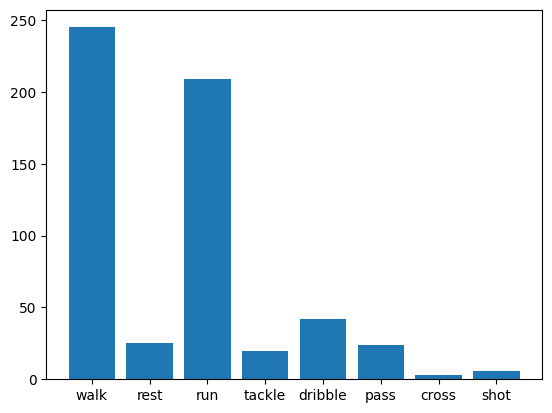

In [28]:
actions_match_1 = match_1_instance.count_actions()

plt.bar(actions_match_1.keys(), actions_match_1.values())

<BarContainer object of 9 artists>

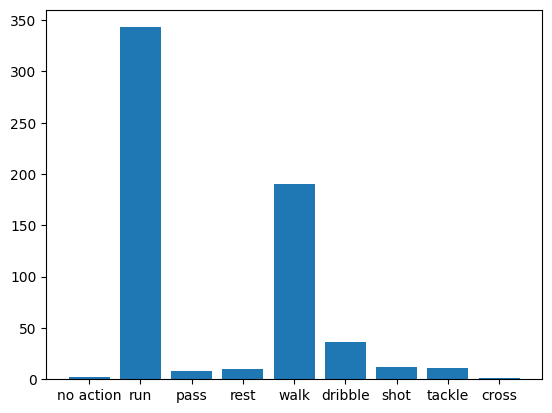

In [29]:
actions_match_2 = match_2_instance.count_actions()
plt.bar(actions_match_2.keys(), actions_match_2.values())

## Norm

In [30]:
accelerometer_dimension = len(match_1_instance.data[0]["norm"])
print(f"Norm dimension: {accelerometer_dimension}")

Norm dimension: 72


In [31]:
# Consistency check
all(len(gait["norm"]) == accelerometer_dimension for gait in match_1_instance.data)

False

In [32]:
match_1_instance.find_min_max()

{'MIN': 1, 'MAX': 227}

In [33]:
match_2_instance.find_min_max()

{'MIN': 3, 'MAX': 723}

In [34]:
match_1_data_with_averaged_norm = match_1_instance.average_data_norm()
match_1_data_with_averaged_norm

[{'label': 'walk', 'norm': 24.166957780185083},
 {'label': 'walk', 'norm': 26.026276390692598},
 {'label': 'walk', 'norm': 23.998176545905707},
 {'label': 'walk', 'norm': 22.59657290497246},
 {'label': 'rest', 'norm': 20.378778196399168},
 {'label': 'walk', 'norm': 28.23765592340506},
 {'label': 'walk', 'norm': 26.56198941145795},
 {'label': 'walk', 'norm': 25.081731147723094},
 {'label': 'run', 'norm': 30.745144284498725},
 {'label': 'run', 'norm': 43.36040697515091},
 {'label': 'run', 'norm': 74.81118010786089},
 {'label': 'run', 'norm': 47.74688658278297},
 {'label': 'run', 'norm': 61.22481878874269},
 {'label': 'run', 'norm': 46.98641222326422},
 {'label': 'run', 'norm': 41.23867057187769},
 {'label': 'run', 'norm': 43.0510509740288},
 {'label': 'run', 'norm': 40.85855066950079},
 {'label': 'run', 'norm': 34.33202180620319},
 {'label': 'run', 'norm': 35.14701851084251},
 {'label': 'run', 'norm': 27.330254507744716},
 {'label': 'run', 'norm': 39.46746113300068},
 {'label': 'run', 'n

In [35]:
match_2_data_with_averaged_norm = match_2_instance.average_data_norm()
match_2_data_with_averaged_norm

[{'label': 'no action', 'norm': 49.32790344450807},
 {'label': 'run', 'norm': 63.44865226360385},
 {'label': 'pass', 'norm': 40.991916710965654},
 {'label': 'rest', 'norm': 20.099576813946786},
 {'label': 'walk', 'norm': 23.147663497060936},
 {'label': 'run', 'norm': 37.34552244176581},
 {'label': 'run', 'norm': 43.989635865983814},
 {'label': 'run', 'norm': 52.90382987723552},
 {'label': 'run', 'norm': 37.83418359723874},
 {'label': 'run', 'norm': 38.02470436076322},
 {'label': 'run', 'norm': 71.54433817974835},
 {'label': 'run', 'norm': 62.84694097088367},
 {'label': 'run', 'norm': 50.480982126840495},
 {'label': 'run', 'norm': 49.83073317138223},
 {'label': 'run', 'norm': 56.390315066906155},
 {'label': 'run', 'norm': 50.346864755054504},
 {'label': 'run', 'norm': 24.504004330510924},
 {'label': 'run', 'norm': 36.69714508583145},
 {'label': 'run', 'norm': 59.60772977198659},
 {'label': 'run', 'norm': 49.19638700924858},
 {'label': 'run', 'norm': 51.56160168003974},
 {'label': 'run',

In [36]:
save_to_json(
    object_to_save=match_1_data_with_averaged_norm,
    path="../data/match_1_data_with_averaged_norm.json",
)
save_to_json(
    object_to_save=match_2_data_with_averaged_norm,
    path="../data/match_2_data_with_averaged_norm.json",
)

In [37]:
match_1_instance.mean_norm_per_action

{'walk': 28.09486687642306,
 'rest': 21.83356684290428,
 'run': 54.40459298904966,
 'tackle': 70.66858172485196,
 'dribble': 52.88252588755935,
 'pass': 64.13327808012248,
 'cross': 46.708457756829354,
 'shot': 113.27871688343295}

In [38]:
match_2_instance.mean_norm_per_action

{'no action': 38.65222535277646,
 'run': 56.22519161734227,
 'pass': 73.00031950031808,
 'rest': 22.712307380205683,
 'walk': 29.869326616095396,
 'dribble': 65.56369756735364,
 'shot': 98.46478534250633,
 'tackle': 66.86037467805848,
 'cross': 93.89217051873887}

<BarContainer object of 8 artists>

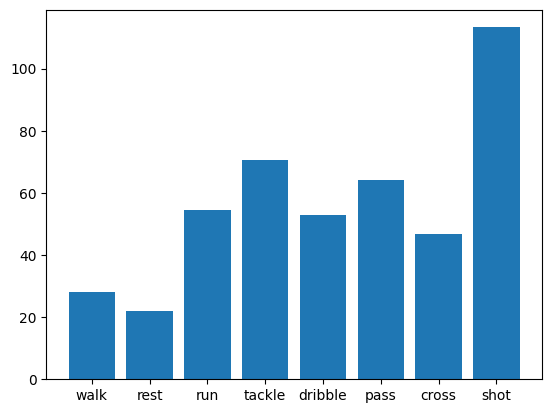

In [39]:
match_1_mean_norm_per_action_dict = match_1_instance.mean_norm_per_action
plt.bar(
    match_1_mean_norm_per_action_dict.keys(), match_1_mean_norm_per_action_dict.values()
)

<BarContainer object of 9 artists>

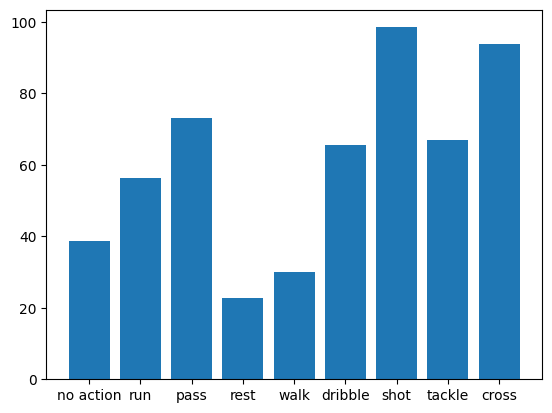

In [40]:
match_2_mean_norm_per_action_dict = match_2_instance.mean_norm_per_action
plt.bar(
    match_2_mean_norm_per_action_dict.keys(), match_2_mean_norm_per_action_dict.values()
)